# NYC Electric Data


## Day 4

In [1]:
import pandas as pd
data = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses.csv')

## Inspect Data

In [2]:
print(f"Shape of data is: {data.shape}")
print('\n================================================================\n')
print(f"Columns in data:\n {list(data.columns)}")

Shape of data is: (2363, 30)


Columns in data:
 ['Period', 'Company Name', 'company contact', 'company email', 'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr', 'Company Type', 'Current fulltime', 'Job created', 'Job retain', 'Effective Date', 'Total Savings', 'Savings from beginning receiving benefits', 'Gas Savings', 'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude', 'Community Board', 'Council District', 'BIN', 'BBL', 'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)']


### 1. How many different companies are represented in the data set?

In [3]:
print(f"There are {data['Company Name'].nunique()} different companies represented in the data set.")

There are 787 different companies represented in the data set.


### 2. What is the total number of jobs created for businesses in Queens?

In [4]:
boroughs_grouped_jobs = data.groupby(['Borough'])['Job created'].count()

print(f"There have been a total of {boroughs_grouped_jobs['QUEENS']} jobs created for businesses in Queens.")

There have been a total of 83 jobs created for businesses in Queens.


### 3. How many different unique email domains names are there in the data set? 

In [5]:
print(f"There are {data['company email'].describe()['unique']} unique email domains in the data set.")

There are 760 unique email domains in the data set.


### 4. Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for   each NTA? 

In [13]:
#find counts for all NTAs 
nta_val_counts = data['Neighborhood Tabulation Area (NTA) (2020)'].value_counts()

#create list of all NTAs with at least five businesses
nta_to_keep = [nta for nta,count in dict(nta_val_counts).items() if count >= 5]

#filter data to only keep rows with NTAs found above
data_nta_5 = data[data['Neighborhood Tabulation Area (NTA) (2020)'].isin(nta_to_keep)] 

#group filtered df by NTA
nta_grouped_df = data_nta_5.groupby(['Neighborhood Tabulation Area (NTA) (2020)'])

#generate avg total savings and total jobs for each NTA in groupby object
savings_jobs_by_NTA = nta_grouped_df.agg({'Total Savings': lambda x: round(x.mean(),2),
                   'Job created': 'count'})

display(savings_jobs_by_NTA)

,Total Savings,Job created
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.96,3
BK0102,12599.75,2
BK0103,19150.92,0
BK0104,21158.25,18
BK0201,15102.04,0
...,...,...
QN1305,166379.35,0
QN1306,21160.51,0
SI0106,6338.25,2


### 5. Save your result for the previous question as a CSV file.

In [14]:
#savings_jobs_by_NTA.to_csv('Savings&JobsCreated_by_NTA.csv', sep = ',')

# Visualizations

## Day 5

In [15]:
#import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 1. Create scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.

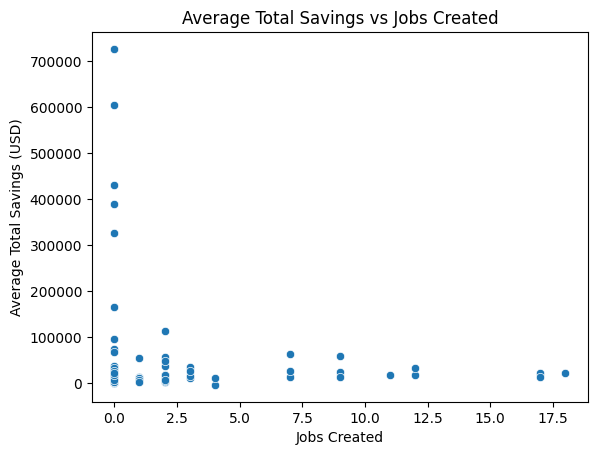

In [9]:
#Standard scale in scatter plot , name of dataset is savings_jobs_by_NTA

sns.scatterplot(data = savings_jobs_by_NTA, x = 'Job created', y = 'Total Savings')
plt.xlabel('Jobs Created')
plt.ylabel('Average Total Savings (USD)')
plt.title('Average Total Savings vs Jobs Created')
plt.show()

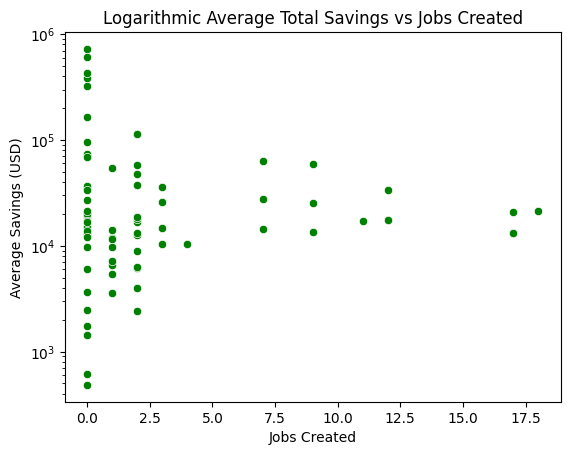

In [10]:
#Log scale
sns.scatterplot(data = savings_jobs_by_NTA, x = 'Job created', y = 'Total Savings', color = 'g')
plt.yscale('log')
plt.xlabel('Jobs Created')
plt.ylabel('Average Savings (USD)')
plt.title('Logarithmic Average Total Savings vs Jobs Created')
plt.show()

### 2. Create histogram of the log of the average total savings.

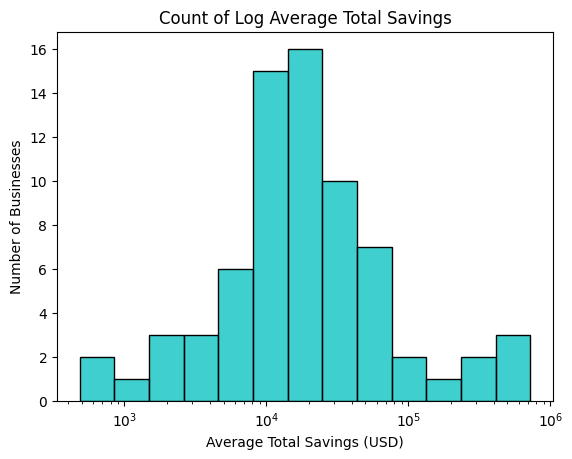

In [11]:
#drop all vals where Total Savings == 0
savings_without_0 = savings_jobs_by_NTA[savings_jobs_by_NTA['Total Savings'] > 0]


sns.histplot(data = savings_without_0, x = 'Total Savings', log_scale = True, color = 'c')
plt.title('Count of Log Average Total Savings')
plt.ylabel('Number of Businesses')
plt.xlabel('Average Total Savings (USD)')

plt.show()

### 3. Create line plot of the total jobs created for each month.

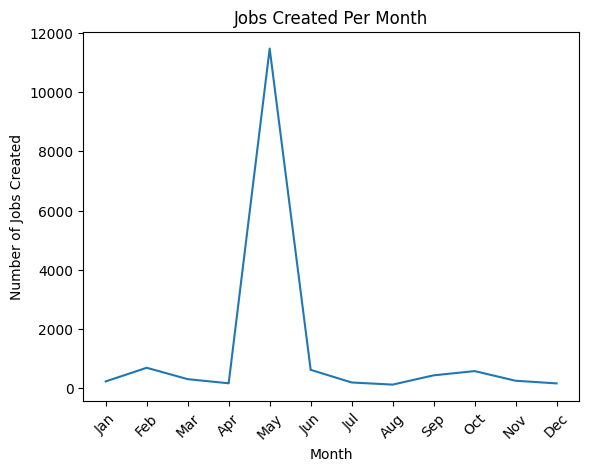

In [16]:
##use original dataset

#create month column
#print(data['Effective Date'].describe())

data['month'] = data['Effective Date'].apply(lambda x: int(str(x)[:2]))

#group job counts by month and sum counts
monthly_job_counts = data.groupby(['month'])['Job created'].sum()

X = np.array(monthly_job_counts.index)

Y = np.array(monthly_job_counts.values)

#construct plot using X,Y derived from groupby object, this step circumvents package inconsistencies for my-binder
plt.plot(X, Y)

plt.xticks(ticks= range(1,13,1), labels =['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],
           rotation = 45)
plt.xlabel('Month')
plt.ylabel('Number of Jobs Created')
plt.title('Jobs Created Per Month')
plt.show()